/home/sidsel/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2787: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Kolonnenavn: Name                 antal fyldte felter: 17981     datatype: object
Kolonnenavn: Age                  antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Nationality          antal fyldte felter: 17981     datatype: object
Kolonnenavn: Overall              antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Potential            antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Club                 antal fyldte felter: 17733     datatype: object
Kolonnenavn: Value                antal fyldte felter: 17981     datatype: object
Kolonnenavn: Wage                 antal fyldte felter: 17981     datatype: object
Kolonnenavn: Special              antal fyldte felter: 17981     datatype: int64
Kolonnenavn: Acceleration         antal fyldte felter: 17981     datatype: object
Kolonnenavn: Aggression           antal fyldte felter: 17981     datatype: object
Kolonnenavn: Agility              antal fyldte felter: 17981     datatype: object
Kolonnenavn: Balance

Teknisk Tirsdag - Data Cleaning.ipynb:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cell_type": "markdown",
Teknisk Tirsdag - Data Cleaning.ipynb:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  {
Teknisk Tirsdag - Data Cleaning.ipynb:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cells": [


Variablenavn: Name                 Variabletype: object
Variablenavn: Age                  Variabletype: int64
Variablenavn: Nationality          Variabletype: object
Variablenavn: Overall              Variabletype: int64
Variablenavn: Potential            Variabletype: int64
Variablenavn: Club                 Variabletype: object
Variablenavn: Value                Variabletype: float64
Variablenavn: Wage                 Variabletype: float64
Variablenavn: Special              Variabletype: int64
Variablenavn: Acceleration         Variabletype: float64
Variablenavn: Aggression           Variabletype: float64
Variablenavn: Agility              Variabletype: float64
Variablenavn: Balance              Variabletype: float64
Variablenavn: Ball control         Variabletype: float64
Variablenavn: Composure            Variabletype: float64
Variablenavn: Crossing             Variabletype: float64
Variablenavn: Curve                Variabletype: float64
Variablenavn: Dribbling            Variabl

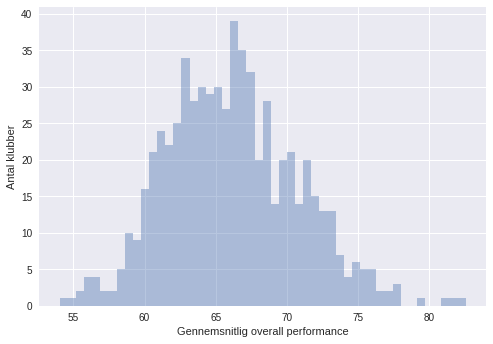

Træningsæt størrelse: 1017 - Testsæt størrelse: 255


In [1]:
# Run the datacleaning notebook to get all the variables
%run 'Teknisk Tirsdag - Data Cleaning.ipynb'

Efter at have hentet vores rensede data, hvor vi minder os selv om, at vi har: <br>
* dansker_set
* topklub_set
* ikke_topklub_set
* overall_set <br>

Plus et *training_df-* og *test_df-* sæt

Først er vil vi gerne kigge lidt på, om vi var grundige nok i vores foranalyse. Derfor laver vi et heatmap, der skal fortælle os noget om vores kolonner i forhold til hinanden.

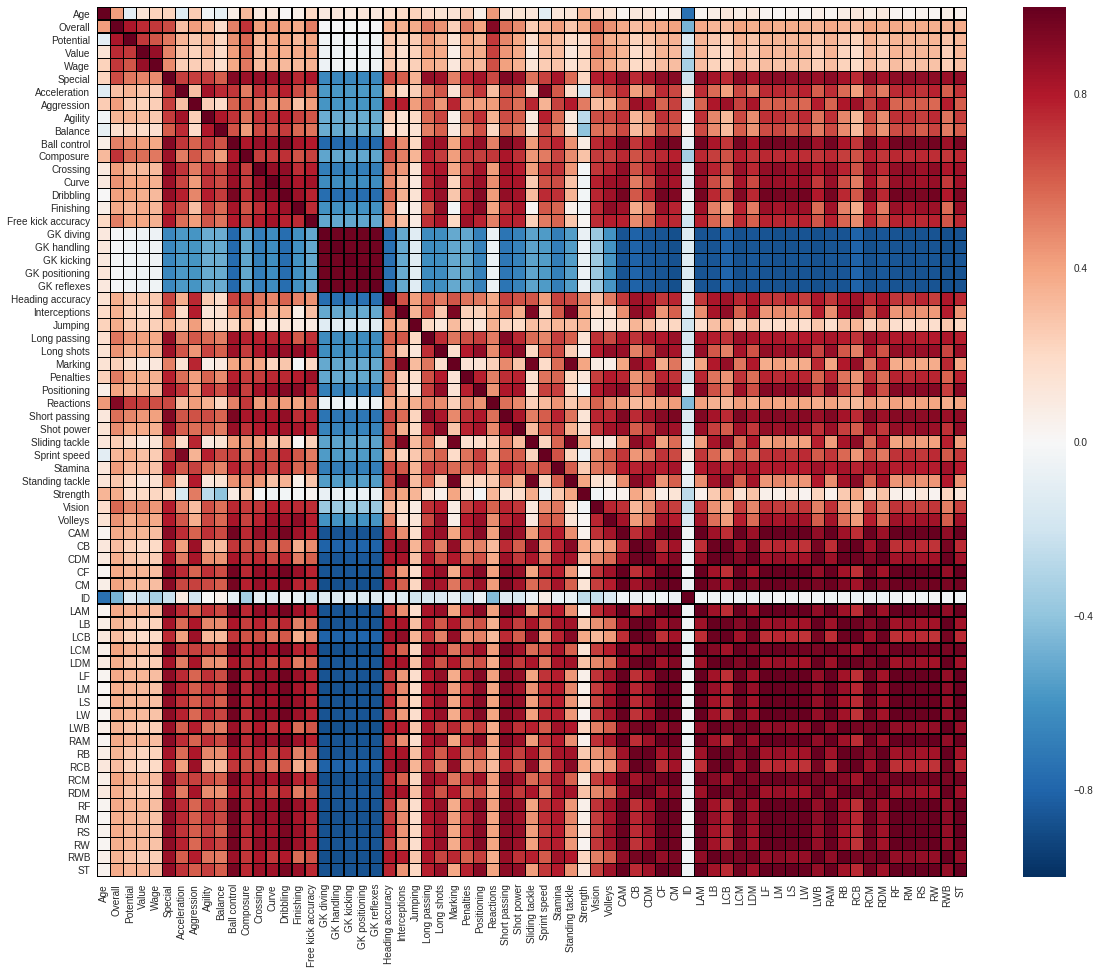

In [2]:
corr = overall_set.corr()

fig = plt.figure(figsize=(20,16))

ax = sb.heatmap(corr, 
                 xticklabels=corr.columns.values,
                 yticklabels=corr.columns.values,
                 linewidths=0.25,
                 vmax=1.0, 
                 square=True, 
                 linecolor='black', 
                 annot=False
                )
plt.show()

Hvad vi ser her, er en korrelationsmatrix. Jo varmere farver, des mere korrelation. <br>
Vi ser altså at der er meget korrelation i vores nedre højre hjørne. Dette er spilpositionerne. Vi ser også et stort blåt kryds, som her er målmandsdata. Disse har meget lidt korrelation med resten af vores datasæt. (Dobbelt klik evt. på plottet, hvis det er meget svært at læse teksten)<br>
Derudover kan vi se, at ID kolonnen slet ikke korrelere. Man kan derfor vælge at tage den ud.

Vi tilføjer nu vores "kendte" labels til vores data. (Hvis man spiller for en af vores topklubber, får man et 1-tal, og ellers får man et 0)

In [3]:
overall_set['label'] = overall_set['Club'].isin(topklub_set.Club).astype(int)

Det kan vi nu splitte og køre logistisk regression på

In [22]:
overall_set.groupby('label').mean()

,Age,Overall,Potential,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
label,,,,,,,,,,,,,,,,,,,,,
0,25.325472,65.750000,70.600629,1.916376e+06,9055.031447,1577.004717,63.542453,55.194969,62.696541,62.603774,...,50.394654,49.339623,51.243711,50.382075,51.196541,52.300314,50.415094,51.569182,50.924528,50.415094
1,25.166667,77.099057,81.856918,1.630118e+07,71496.855346,1817.268868,69.382075,62.413522,68.784591,66.122642,...,58.400943,56.378931,61.515723,58.900943,61.589623,62.281447,60.044025,61.707547,59.371069,60.044025


In [32]:
print(np.min(overall_set.Age))
print(np.max(overall_set.Age))
print(np.min(topklub_set.Age))
print(np.max(topklub_set.Age))
print(np.min(ikke_topklub_set.Age))
print(np.max(ikke_topklub_set.Age))

16
40
16
40
16
40


In [35]:
print(np.min(df.Age))
print(np.max(df.Age))

16
47


### Observationer
* Alderen siger ikke rigtig noget om, hvorvidt du spiller for en topklub eller ej
* Man får 

In [4]:
y = overall_set['label']
X = overall_set.iloc[:,0:-1].select_dtypes(include=['float64', 'int64'])

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
model = LogisticRegression()
model = model.fit(X,y)

model.score(X,y)

0.83490566037735847

Altså er har vores model ret i 
{{'{:.0f}'.format(100*model.score(X_train, y_train))}}% af tiden i træningssættet. <br>

Pretty good!! Men hvis vi kigger på vores *y* værdier

In [10]:
print(y.mean())
y.value_counts()

0.5


1    636
0    636
Name: label, dtype: int64

Kan vi se, at præcis halvdelen af vores spillere (uden danskere) faktisk spillede for en af vores topklubber. Vi havde altså 50% change for at gætte på den rigtige klub

In [17]:
overall_set.where(overall_set.Club.isin(topklub_set.Club))

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,label
0,Cristiano Ronaldo,32.0,Portugal,94.0,94.0,Real Madrid CF,95500000.0,565000.0,2228.0,89.0,...,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,1.0
1,L. Messi,30.0,Argentina,93.0,93.0,FC Barcelona,105000000.0,565000.0,2154.0,92.0,...,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,1.0
2,Neymar,25.0,Brazil,92.0,94.0,Paris Saint-Germain,123000000.0,280000.0,2100.0,94.0,...,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,1.0
3,L. Suárez,30.0,Uruguay,92.0,92.0,FC Barcelona,97000000.0,510000.0,2291.0,88.0,...,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,1.0
4,M. Neuer,31.0,Germany,92.0,92.0,FC Bayern Munich,61000000.0,230000.0,1493.0,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,R. Lewandowski,28.0,Poland,91.0,91.0,FC Bayern Munich,92000000.0,355000.0,2143.0,79.0,...,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0,1.0
6,De Gea,26.0,Spain,90.0,92.0,Manchester United,64500000.0,215000.0,1458.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,E. Hazard,26.0,Belgium,90.0,91.0,Chelsea,90500000.0,295000.0,2096.0,93.0,...,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0,1.0
8,T. Kroos,27.0,Germany,90.0,90.0,Real Madrid CF,79000000.0,340000.0,2165.0,60.0,...,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0,1.0
9,G. Higuaín,29.0,Argentina,90.0,90.0,Juventus,77000000.0,275000.0,1961.0,78.0,...,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0,1.0


In [133]:
overall_set.iloc[300:400,0:]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,label
567,S. Vrsaljko,25,Croatia,79,83,Atlético Madrid,13500000.0,54000.0,2044,80.0,...,76.0,73.0,76.0,69.0,73.0,67.0,71.0,79.0,67.0,1
577,F. Ghoulam,26,Algeria,79,82,Napoli,13000000.0,68000.0,2067,74.0,...,75.0,72.0,75.0,70.0,73.0,70.0,71.0,78.0,70.0,1
582,L. Tonelli,27,Italy,79,81,Napoli,12500000.0,68000.0,1678,72.0,...,78.0,53.0,69.0,49.0,52.0,50.0,50.0,68.0,50.0,1
586,L. Digne,23,France,79,84,FC Barcelona,14000000.0,125000.0,2052,79.0,...,75.0,75.0,76.0,72.0,75.0,69.0,73.0,78.0,69.0,1
587,Paco Alcácer,23,Spain,79,85,FC Barcelona,17500000.0,150000.0,1859,72.0,...,46.0,66.0,51.0,77.0,72.0,78.0,74.0,53.0,78.0,1
592,Nolito,30,Spain,79,79,Sevilla FC,12000000.0,26000.0,1986,74.0,...,51.0,74.0,62.0,78.0,77.0,74.0,78.0,62.0,74.0,1
598,P. Jones,25,England,79,80,Manchester United,12500000.0,115000.0,1860,51.0,...,78.0,67.0,75.0,61.0,63.0,62.0,60.0,73.0,62.0,1
603,A. Areola,24,France,79,86,Paris Saint-Germain,13000000.0,54000.0,1266,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
604,Escudero,27,Spain,79,79,Sevilla FC,10500000.0,22000.0,2047,72.0,...,75.0,71.0,76.0,67.0,71.0,65.0,68.0,78.0,65.0,1
607,S. Corchia,26,France,79,80,Sevilla FC,12000000.0,22000.0,2114,77.0,...,76.0,75.0,76.0,73.0,75.0,71.0,74.0,78.0,71.0,1


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print('Træningsæt størrelse: {} - Testsæt størrelse: {}'.format(len(X_train), len(X_test)))

In [7]:
training_df['label'] = training_df['Club'].isin(topklub_set.Club).astype(int)
test_df

/home/sidsel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,label
12415,U. Yuvakuran,19,Turkey,63,79,Beşiktaş JK,650000.0,3000.0,940,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228,89.0,...,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,1
14341,G. Burke,23,Republic of Ireland,61,67,Shamrock Rovers,350000.0,1000.0,1533,56.0,...,34.0,57.0,43.0,59.0,60.0,58.0,60.0,44.0,58.0,0
3978,I. Hajrović,25,Bosnia Herzegovina,72,73,SV Werder Bremen,3700000.0,18000.0,1906,77.0,...,50.0,67.0,57.0,72.0,71.0,69.0,73.0,59.0,69.0,0
1110,S. Sturaro,24,Italy,77,82,Juventus,11500000.0,81000.0,2110,76.0,...,74.0,76.0,76.0,73.0,74.0,71.0,73.0,76.0,71.0,1
453,M. Schmelzer,29,Germany,80,80,Borussia Dortmund,11000000.0,63000.0,2000,75.0,...,78.0,68.0,76.0,64.0,68.0,64.0,66.0,78.0,64.0,1
11187,Claudio,23,Spain,64,71,Real Sporting de Gijón,650000.0,3000.0,1496,61.0,...,42.0,50.0,41.0,59.0,55.0,63.0,57.0,42.0,63.0,0
3080,V. Laurini,28,France,73,73,Fiorentina,3200000.0,4000.0,1778,82.0,...,70.0,59.0,68.0,54.0,61.0,52.0,58.0,71.0,52.0,0
1956,T. Hernández,19,France,75,85,Real Madrid CF,9000000.0,52000.0,1910,82.0,...,72.0,64.0,69.0,66.0,69.0,66.0,68.0,74.0,66.0,1
15318,D. Rice,18,Republic of Ireland,59,78,West Ham United,290000.0,5000.0,1416,61.0,...,61.0,51.0,58.0,46.0,48.0,45.0,46.0,56.0,45.0,0


Dette var lidt for show, da vi nu deler *training_df* ud i *X_train* og *y_train*, hvor *y_train* kun er vores *label* vektor, og hvor vi kun vælge numeriske kolonner for *X_train*

In [10]:
y_train = training_df['label']
X_train = training_df.iloc[:,0:-1].select_dtypes(include=['float64', 'int64'])

Og vi er nu klar til at prøve vores første Machine Learning algorite af !!

## Logistic regression model

Først henter vi nogle gode pakker fra Scikit Learn (generelt super hvis man vil lave data science)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

/home/sidsel/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Vi fitter nu en logistic regression classifier til vores data, og fitter en model, så den kan genkende om man spiller for en topklub eller ej, og evaluere resultatet:

In [14]:
classifier = LogisticRegression()
model = classifier.fit(X_train, y_train)
model.score(X_train, y_train)

0.84070796460176989

In [112]:
# predict class labels for the test set
predicted = model.predict(X_test)
print(predicted)

NameError: name 'X_test' is not defined

In [ ]:
# evaluation metrics
from sklearn import metrics
print(metrics.accuracy_score(), prediction)
print(metrics.roc_auc_score(dansker_set.select_dtypes(include=['float64', 'int']), dansker_probs[:, 1]))

Altså er har vores model ret i 
{{'{:.0f}'.format(100*model.score(X_train, y_train))}}% af tiden i træningssættet. <br>

Pretty good!!

Vi kan du lave prediction og probability på vores danske spillere

In [106]:
dansker_set['Sandsynligheder [0,1]'].tolist()[:][1]

[0.012741509220970504, 0.9872584907790295]

In [15]:
dansker_pred = classifier.predict(dansker_set.select_dtypes(include=['float64', 'int64']))
dansker_probs = classifier.predict_proba(dansker_set.select_dtypes(include=['float64', 'int']))

In [109]:
# evaluation metrics
from sklearn import metrics
print(metrics.accuracy_score(dansker_set.select_dtypes(include=['float64', 'int']), dansker_pred))
print(metrics.roc_auc_score(dansker_set.select_dtypes(include=['float64', 'int']), dansker_probs[:, 1]))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [96]:
dansker_set['Sandsynligheder [0,1]'] = dansker_probs.tolist()
dansker_set['Prediction'] = pd.Series(dansker_pred, index=dansker_set.index)

/home/sidsel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [94]:
dansk_df = dansker_set[['Name', 'Club', 'Sandsynligheder [0,1]', 'Prediction']].sort_values('Prediction', ascending=False)
dansk_df

,Name,Club,"Sandsynligheder [0,1]",Prediction
36,C. Eriksen,Tottenham Hotspur,"[1.1699850543944734e-07, 0.9999998830014946]",1
1600,J. Lössl,Huddersfield Town,"[0.426887573163219, 0.573112426836781]",1
182,K. Schmeichel,Leicester City,"[0.012741509220970504, 0.9872584907790295]",1
2983,J. Hansen,FC Midtjylland,"[0.49803863418447225, 0.5019613658155277]",1
2795,E. Sviatchenko,Celtic,"[0.36799070417848956, 0.6320092958215104]",1
6024,P. Mtiliga,FC Nordsjælland,"[0.46506902830572017, 0.5349309716942798]",1
3733,L. Vibe,Brentford,"[0.4693493962184755, 0.5306506037815245]",1
2549,P. Sisto,RC Celta de Vigo,"[0.36726084236352596, 0.632739157636474]",1
4299,J. Poulsen,FC Midtjylland,"[0.37832587032208975, 0.6216741296779102]",1
2243,R. Falk Jensen,FC København,"[0.42738053247789065, 0.5726194675221093]",1


In [56]:
dansk_df.loc[:,'pred=1'] = dansker_set['Sandsynligheder [0,1]'].map(lambda x: x[1]).sort_values(ascending=False)

In [67]:
test = dansk_df.sort('pred=1', ascending=False)

/home/sidsel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


In [74]:
test.set_index('in').iloc[:,0:-1]

,Name,Club,"Sandsynligheder [0,1]",Prediction
in,,,,
1,C. Eriksen,Tottenham Hotspur,"[1.1699850543944734e-07, 0.9999998830014946]",1
2,A. Christensen,Chelsea,"[0.004543775546096862, 0.9954562244539031]",1
3,K. Schmeichel,Leicester City,"[0.012741509220970504, 0.9872584907790295]",1
4,D. Wass,RC Celta de Vigo,"[0.08739594433270481, 0.9126040556672952]",1
5,Y. Poulsen,RB Leipzig,"[0.09246201028633294, 0.9075379897136671]",1
6,S. Kjær,Sevilla FC,"[0.09856265763177086, 0.9014373423682291]",1
7,J. Vestergaard,Borussia Mönchengladbach,"[0.09983945220193347, 0.9001605477980665]",1
8,N. Jørgensen,Feyenoord,"[0.11672015011865144, 0.8832798498813486]",1
9,P. Højbjerg,Southampton,"[0.15933046398830086, 0.8406695360116991]",1


In [92]:
topklub_set.Club.unique()

array(['Real Madrid CF', 'FC Barcelona', 'Paris Saint-Germain',
       'FC Bayern Munich', 'Manchester United', 'Chelsea', 'Juventus',
       'Arsenal', 'Atlético Madrid', 'Borussia Dortmund', 'Milan',
       'Napoli', 'Inter', 'Liverpool', 'Roma', 'Beşiktaş JK',
       'Bayer 04 Leverkusen', 'Athletic Club de Bilbao', 'Sporting CP',
       'FC Porto', 'Sevilla FC', 'SL Benfica'], dtype=object)

In [71]:
test.loc[:,'in'] = np.arange(1, len(dansk_df)+1)

In [79]:
test.loc[test.Name == 'N. Bendtner']

,Name,Club,"Sandsynligheder [0,1]",Prediction,pred=1,in
2697,N. Bendtner,Rosenborg BK,"[0.5796111364835776, 0.4203888635164224]",0,0.420389,39


In [60]:
dansk_df.sort('pred=1', ascending=False)

/home/sidsel/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,Name,Club,"Sandsynligheder [0,1]",Prediction,pred=1
36,C. Eriksen,Tottenham Hotspur,"[1.1699850543944734e-07, 0.9999998830014946]",1,1.000000
309,A. Christensen,Chelsea,"[0.004543775546096862, 0.9954562244539031]",1,0.995456
182,K. Schmeichel,Leicester City,"[0.012741509220970504, 0.9872584907790295]",1,0.987258
482,D. Wass,RC Celta de Vigo,"[0.08739594433270481, 0.9126040556672952]",1,0.912604
1480,Y. Poulsen,RB Leipzig,"[0.09246201028633294, 0.9075379897136671]",1,0.907538
369,S. Kjær,Sevilla FC,"[0.09856265763177086, 0.9014373423682291]",1,0.901437
570,J. Vestergaard,Borussia Mönchengladbach,"[0.09983945220193347, 0.9001605477980665]",1,0.900161
590,N. Jørgensen,Feyenoord,"[0.11672015011865144, 0.8832798498813486]",1,0.883280
1847,P. Højbjerg,Southampton,"[0.15933046398830086, 0.8406695360116991]",1,0.840670
696,K. Dolberg,Ajax,"[0.19054569185289116, 0.8094543081471088]",1,0.809454


In [59]:
dansk_df

,Name,Club,"Sandsynligheder [0,1]",Prediction,pred=1
36,C. Eriksen,Tottenham Hotspur,"[1.1699850543944734e-07, 0.9999998830014946]",1,1.000000
1600,J. Lössl,Huddersfield Town,"[0.426887573163219, 0.573112426836781]",1,0.573112
182,K. Schmeichel,Leicester City,"[0.012741509220970504, 0.9872584907790295]",1,0.987258
2983,J. Hansen,FC Midtjylland,"[0.49803863418447225, 0.5019613658155277]",1,0.501961
2795,E. Sviatchenko,Celtic,"[0.36799070417848956, 0.6320092958215104]",1,0.632009
6024,P. Mtiliga,FC Nordsjælland,"[0.46506902830572017, 0.5349309716942798]",1,0.534931
3733,L. Vibe,Brentford,"[0.4693493962184755, 0.5306506037815245]",1,0.530651
2549,P. Sisto,RC Celta de Vigo,"[0.36726084236352596, 0.632739157636474]",1,0.632739
4299,J. Poulsen,FC Midtjylland,"[0.37832587032208975, 0.6216741296779102]",1,0.621674
2243,R. Falk Jensen,FC København,"[0.42738053247789065, 0.5726194675221093]",1,0.572619
